# Data summarization evaluation

1. From the dataset D create train dataset D1 (90%) and test dataset D0 (10%)
2. Train model (M1) on the dataset (D1)

2. Generate a summarization dataset from D1 and M1 using some technique (D2i) with i: 25%, 50%, 75% of data

3. Train a new model (M2i) on D2i
    1. Identify a new set of best hyperparameters
    
4. Compare M1 and M2i
    1. Compare errors of M1 and M2i on the complete dataset D1.
    2. Compare errors M1 and M2i on D1\D2i
    3. Compare errors on the test dataset (D0)
    4. (Compare feature importance vectors for individual data points from M1 and M2i)

In [55]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import json
import string

import pandas as pd
import numpy as np
import diversipy

from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error
from graphviz import Digraph

from utils.misc import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
dataset_name = 'ccpp'

In [56]:
dataset = pd.read_csv('datasets/{}.csv'.format(dataset_name))

In [57]:
df = summarize(dataset_name, dataset, 3000, '')

In [ ]:
df

In [58]:
job = train(dataset_name, df)

session: job_lnmeb	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp7zc1p8ef --config /tmp/tmpdgxiscbe --output /tmp/tmp3my6pt56 --persist /tmp/tmpbb7efecu


In [59]:
job.wait_job_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp7zc1p8ef --config /tmp/tmpdgxiscbe --output /tmp/tmp3my6pt56 --persist /tmp/tmpbb7efecu (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [feature/incremental-learning L|✚ 1…26⚑ 3] 11:44 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmp7zc1p8ef --config /tmp/tmpdgxiscbe --output /tmp/tmp3my6pt56 --persist /tmp/tmpbb7efecu 2021-03-05 10:44:09,682565 UTC [22270] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 93946a5deec802) Copyright (c) 2021 Elasticsearch BV 2021-03-05 10:44:09,682662 UTC [22270] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 10:44:09,682683 UTC [22270] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 10:44:09,683163 UTC [22270] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 10:44:09,685735 UTC [22270] DEBUG CDataFrameAnalyzer.cc@104 Received 3000 rows 2021-03-05 10:44:25,035129 UTC [22270] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 10:44:26,391254 UTC [22270] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":23058065} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":5839837} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":15884} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":99} ] 2021-03-05 10:44:26,391395 UTC [22270] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [feature/incremental-learning L|✚ 1…26⚑ 3] 11:44 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":463.6281127929687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":427.6612854003906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":472.4757080078125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":436.4240417480469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":481.1231689453125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":440.9913635253906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.4188232421875 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.6852722167969 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Getting model from True /tmp/tmpbb7efecu
Job succeeded


In [60]:
job.get_model_blob()

'\x00{"index":{"_id":"ccpp_regression_state#1"}}\n\n{"compressed" : [ "H4sIAAAAAAAA/+y967Ilx3Gl+Spj/D1MC7+Fh7MfBgZJkJo2FCkDoLbpaZt3n7UyCz0EeLbEqNx5MkNWIHFhsVC1fcfFL+H+rf/1u9xEfveH3/3u//zdP3z/P3/46Y/f//m7v/zbz3/81z/+P9///Me//Pl3f/hf+Clx/Iwf//wv+AfpWq5tuPQeo7cMiz9k9aajh6qUW0S2hn/hX//45+/+4S///ud/+v7H/8lf6Z9++PNPP3z3P374x5//8iN+pd/L5tK0YrQ2uozSP7StNc+qYa2rZPRsvf9BNg1r6vhplqPlcP5E1abS0/Hv1ciUP9SG3zmkS0m44f/df1q0X/9hf/i9bSkyFL+5RcbwUPwW+MXxi+AvI/CvZ+Dfld/8q/13/y+M+v7//g+Nwm8pzV3VB+zy3rrhVy/xgc+vql20tfiDbaIyYgxYKZWwlj8LnxpfBL5YUzeB5Q7TS8rw1Ubu/2LDj/zh97oV/9VO88zVnRZoNzH8JcK779aP31jgtOCHH3/8y4/f/Y/vf8Rq/+MPP+FDtw2r2DO0+OlCdP80feAj62j4fbL34u8g1UyzjVCaklyZxN9VvLQ5fia/SfwK7hFNRGjO/rOaxrDAp1WvPvhDUrCq0lvHN+4V/KGuvePX7vy38OtiC/1fP/z45x/+9N2/ff/j9//6w88//PjTB185Putv/7MvFHbfl3/9H//ylx//6Y9//v7nH777pz/+9DPN/u6nf/z+Tz989MtxD8ofJv/K3/Cf//3P/8hD892//oBj9D++/9O/f/n18YsO2PI9/8f3H++ZaOlRWABsRsXyd/yy3ZqX4QvClhdsTe4jxfeMf+zVCj+ORfnop+nmOCSROB341kcED1Z6/fUfo/7we99wlk3V+C/2yD7+EAPWYPvvhxvHfD994spf7ctfjbb+A7933

In [62]:
job2 = evaluate(dataset_name=dataset_name, dataset=df, model=job.get_model_blob())

session: job_tgbhv	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpvruy7bwv --config /tmp/tmp6dp99efg --output /tmp/tmpiogmubez --restore /tmp/tmpigy9utwl


In [63]:
job2.wait_job_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpvruy7bwv --config /tmp/tmp6dp99efg --output /tmp/tmpiogmubez --restore /tmp/tmpigy9utwl (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [feature/incremental-learning L|✚ 1…26⚑ 3] 11:46 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpvruy7bwv --config /tmp/tmp6dp99efg --output /tmp/tmpiogmubez --restore /tmp/tmpigy9utwl 2021-03-05 10:46:00,097666 UTC [31065] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 93946a5deec802) Copyright (c) 2021 Elasticsearch BV 2021-03-05 10:46:00,097722 UTC [31065] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-05 10:46:00,097735 UTC [31065] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-05 10:46:00,099623 UTC [31065] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-05 10:46:00,102398 UTC [31065] DEBUG CDataFrameAnalyzer.cc@104 Received 3000 rows 2021-03-05 10:46:00,247688 UTC [31065] DEBUG CStateDecompressor.cc@168 Explicit end-of-stream marker found in document with index 1 2021-03-05 10:46:00,802377 UTC [31065] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-05 10:46:01,250778 UTC [31065] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":23058065} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":4461347} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":732} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":99} ] 2021-03-05 10:46:01,250820 UTC [31065] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [feature/incremental-learning L|✚ 1…26⚑ 3] 11:46 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":463.6281127929687 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":427.6612854003906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":472.4757080078125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":436.4240417480469 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":481.1231689453125 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":440.9913635253906 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":465.4188232421875 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""PE_prediction"":464.6852722167969 ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


Getting model from False None
Job succeeded


In [64]:
job2.get_predictions()

array([453.86029053, 432.58724976, 467.00082397, ..., 440.99136353,
       465.41882324, 464.68527222])

In [65]:
job.get_predictions()

array([453.86029053, 432.58724976, 467.00082397, ..., 440.99136353,
       465.41882324, 464.68527222])

## 1. 2D projection and clustering

Let's project the data in 2-d using manifold learning and color data points in the same color if they belong to the same leaf.

In [9]:
job = run_job(input="datasets/{}.csv".format(dataset_name), 
              config="configs/{}.json".format(dataset_name),
              persist="model1.json")

session: job_vprsn	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input datasets/regression_house_16h.csv --config configs/regression_house_16h.json --output /tmp/tmp3euwjdrc --persist model1.json


In [13]:
results = wait_job_complete(job)

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input datasets/regression_house_16h.csv --config configs/regression_house_16h.json --output /tmp/tmp3euwjdrc --persist model1.json (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [feature/incremental-learning L|✚ 1…26⚑ 3] 16:43 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input datasets/regression_house_16h.csv --config configs/regression_house_16h.json --output /tmp/tmp3euwjdrc --persist model1.json 2021-03-04 15:43:43,792544 UTC [16841] DEBUG Main.cc@141 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build 93946a5deec802) Copyright (c) 2021 Elasticsearch BV 2021-03-04 15:43:43,792589 UTC [16841] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-03-04 15:43:43,792600 UTC [16841] DEBUG CSystemCallFilter_Linux.cc@127 Seccomp BPF filters available 2021-03-04 15:43:43,794439 UTC [16841] DEBUG CSystemCallFilter_Linux.cc@153 Seccomp BPF installed 2021-03-04 15:43:43,853988 UTC [16841] DEBUG CDataFrameAnalyzer.cc@104 Received 22784 rows 2021-03-04 15:45:41,231486 UTC [16841] INFO CBoostedTreeImpl.cc@237 Exiting hyperparameter optimisation loop early 2021-03-04 15:45:47,910571 UTC [16841] INFO Main.cc@241 [{""name"":""E_DFTPMEstimatedPeakMemoryUsage"",""description"":""The upfront estimate of the peak memory training the predictive model would use"",""value"":43431869} ,{""name"":""E_DFTPMPeakMemoryUsage"",""description"":""The peak memory training the predictive model used"",""value"":44912989} ,{""name"":""E_DFTPMTimeToTrain"",""description"":""The time it took to train the predictive model"",""value"":123613} ,{""name"":""E_DFTPMTrainedForestNumberTrees"",""description"":""The total number of trees in the trained forest"",""value"":309} ] 2021-03-04 15:45:47,910713 UTC [16841] DEBUG Main.cc@246 ML data frame analyzer exiting (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks [feature/incremental-learning L|✚ 1…26⚑ 3] 16:45 $",",{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":28903.859375,"" ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":13974.18261718 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":54561.7109375, ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":40849.4453125, ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":25552.37695312 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":31929.29882812 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":22945.05664062 ,{""row_results"":{""checksum"":0,""results"":{""ml"":{""price_prediction"":66828.3046875, ,{""model_metadata"":{""total_feature_importance"":[],""hyperparameters"":[{""name"":""do ]"


In [12]:
# keep only the last checkpoint with the final model
!echo "$(tail -n 3 model1.json)" > model1.json

/bin/bash: warning: command substitution: ignored null byte in input


In [39]:
definition = get_model_definition(results)
trained_models = definition['trained_model']['ensemble']['trained_models']
forest = Forest(trained_models)

In [14]:
df = pd.read_csv("datasets/facebook_6000.csv")

In [15]:
df.drop(columns=['54'])

,1,10,11,12,13,14,15,16,17,18,...,49,5,50,51,52,53,6,7,8,9
0,8070687,0.0,1493.0,142.333333,26.0,257.893967,0.0,1534.0,140.101149,28.0,...,0,0.0,0,0,0,0,1678.0,399.324138,261.0,363.995659
1,115669,0.0,25.0,0.644231,0.0,2.162002,0.0,25.0,0.557692,0.0,...,0,0.0,0,0,0,0,28.0,1.692308,0.0,3.797967
2,1422427,0.0,174.0,11.682192,3.0,21.630593,0.0,204.0,12.509589,2.0,...,0,0.0,0,0,1,0,214.0,34.494521,19.0,41.042118
3,32590,0.0,29.0,1.312500,1.0,2.973187,0.0,23.0,1.257812,0.0,...,0,0.0,0,0,0,0,40.0,3.281250,2.0,5.415455
4,209071,0.0,54.0,1.206294,0.0,4.560713,0.0,73.0,1.209790,0.0,...,0,0.0,1,0,0,0,163.0,3.461538,1.0,11.291602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1204214,0.0,98.0,2.022447,0.0,6.093321,0.0,96.0,2.021324,0.0,...,1,0.0,0,0,0,0,105.0,5.699214,3.0,10.894731
5996,5365996,0.0,651.0,24.579556,6.0,54.075242,0.0,646.0,23.405014,3.0,...,1,0.0,0,0,0,0,755.0,64.947927,35.0,95.153508
5997,5103,0.0,3.0,0.177215,0.0,0.557106,0.0,3.0,0.196203,0.0,...,0,0.0,1,0,0,0,5.0,0.449367,0.0,1.070594
5998,11384,0.0,56.0,5.672209,3.0,7.468821,0.0,50.0,5.003563,2.0,...,0,0.0,0,1,0,0,58.0,15.112827,13.5,9.520716


In [52]:
forest.trees[1].nodes[0].split_feature

'31'

In [16]:
forest.trees[1].get_leaf_id(df.loc[1])

14

In [18]:
forest.trees[1].get_leaf_id(df.loc[2])

10

In [32]:
forest.trees[1].get_tree_distance(df.loc[20], df.loc[6])

[0, 1, 8, 10]
[0, 1, 7, 14]
[ 8 10]


4

In [66]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, MDS
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [68]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df)

In [67]:
embedding = Isomap(n_components=2)

In [111]:
embedding = LocallyLinearEmbedding(n_components=2)

In [118]:
embedding = SpectralEmbedding(n_components=2)

In [121]:
embedding = MDS(n_components=2)

In [69]:
X_transformed = embedding.fit_transform(X_normalized)

<AxesSubplot:>

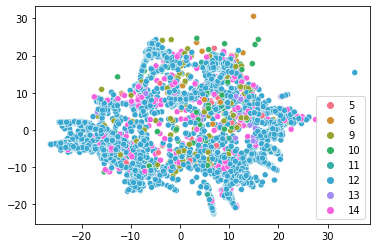

In [70]:
tree = forest.trees[3]
cmap = sns.color_palette('husl', tree.number_leaves)
colors = [tree.get_leaf_id(df.loc[i]) for i in range(X_transformed.shape[0])]
sns.scatterplot(x = X_transformed[:,0], y = X_transformed[:,1], 
                hue=colors, legend='full', palette=cmap)

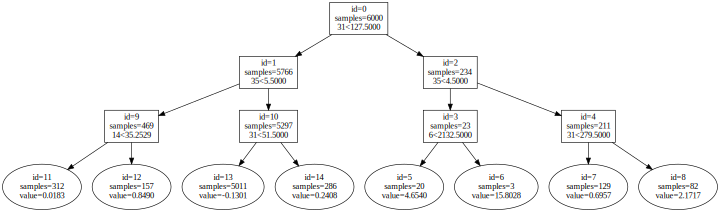

In [64]:
forest.show_tree(4)

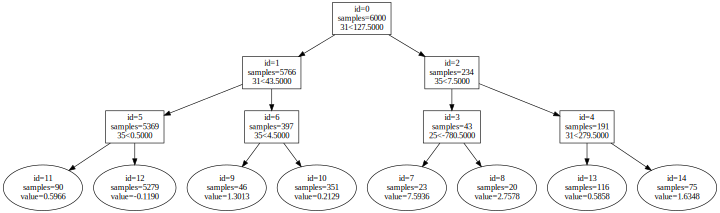

In [65]:
forest.show_tree(5)

## 3. Stable neighbouhood

Define metric over the siblings order of the tree. 

In [104]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage



In [58]:
def tree_distance_matrix(forest, tree_index, nrows=100):
#     nrows = 100 # df.shape[0]
    K = np.zeros((nrows, nrows))
    for i in range(nrows):
        for j in range(i+1,nrows):
            K[i,j] = K[j,i] = forest.trees[tree_index].get_tree_distance(df.loc[i], df.loc[j])
    return K

In [96]:
K = []
for tree_index in range(1,17):
    K.append(tree_distance_matrix(forest, tree_index, 1000))

In [114]:
number_trees = len(K)
S = np.zeros((number_trees, number_trees))
for i in range(number_trees):
    for j in range(i, number_trees):
        S[i,j] = S[j,i] = np.mean(np.abs(K[i] - K[j]))# np.linalg.norm(K[i] - K[j])

In [62]:
import plotly.express as px

In [95]:
px.imshow(S)

In [116]:
px.imshow(S)

In [115]:
ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(S, 'complete')

px.imshow(ordered_dist_mat)

In [107]:
print(res_order)

[6, 10, 15, 7, 9, 14, 11, 1, 8, 0, 5, 2, 4, 13, 3, 12]


## 4. Manifold for metric

In [90]:
embedding = Isomap(n_components=4)

In [87]:
X_transformed = X_normalized[:100]

In [91]:
X_transformed = embedding.fit_transform(X_normalized[:100])

In [92]:
Kstar = pairwise_distances(X_transformed)

In [93]:
kstar = Kstar/Kstar.sum(axis=1)
for i in range(len(K)):
    k = K[i]/K[i].sum(axis=1)
    print('{}: norm Ki {:.4f} norm Kstar {:.4f} norm diff {:.4f}'.format(i, np.linalg.norm(k), 
                                                             np.linalg.norm(kstar), 
                                                             np.linalg.norm(k-kstar)))

0: norm Ki 2.6672 norm Kstar 1.0966 norm diff 2.3650
1: norm Ki 2.9351 norm Kstar 1.0966 norm diff 2.6460
2: norm Ki 2.6784 norm Kstar 1.0966 norm diff 2.3781
3: norm Ki 2.8041 norm Kstar 1.0966 norm diff 2.5198
4: norm Ki 2.6784 norm Kstar 1.0966 norm diff 2.3781
5: norm Ki 2.6784 norm Kstar 1.0966 norm diff 2.3781
6: norm Ki 3.5144 norm Kstar 1.0966 norm diff 3.2411
7: norm Ki 3.0896 norm Kstar 1.0966 norm diff 2.8031
8: norm Ki 2.9351 norm Kstar 1.0966 norm diff 2.6460
9: norm Ki 3.0896 norm Kstar 1.0966 norm diff 2.8031
10: norm Ki 3.3029 norm Kstar 1.0966 norm diff 3.0211
11: norm Ki 2.8279 norm Kstar 1.0966 norm diff 2.5361
12: norm Ki 2.2133 norm Kstar 1.0966 norm diff 1.8858
13: norm Ki 3.2963 norm Kstar 1.0966 norm diff 3.0301
14: norm Ki 2.4664 norm Kstar 1.0966 norm diff 2.1554
15: norm Ki 3.1265 norm Kstar 1.0966 norm diff 2.8504


In [8]:
import squarify

# these values define the coordinate system for the returned rectangles
# the values will range from x to x + width and y to y + height
x = 0.
y = 0.
width = 700.
height = 433.

values = [500, 433, 78, 25, 25, 7]

# values must be sorted descending (and positive, obviously)
values.sort(reverse=True)

# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# returns a list of rectangles
rects = squarify.squarify(values, x, y, width, height)

# padded rectangles will probably visualize better for certain cases
padded_rects = squarify.padded_squarify(values, x, y, width, height)

In [9]:
padded_rects

[{'x': 1.0, 'y': 1.0, 'dx': 325.7153558052434, 'dy': 431.0},
 {'x': 328.7153558052434,
  'y': 1.0,
  'dx': 370.2846441947566,
  'dy': 328.0862676056338},
 {'x': 328.7153558052434,
  'y': 331.0862676056338,
  'dx': 213.0977944236371,
  'dy': 100.9137323943662},
 {'x': 543.8131502288805,
  'y': 331.0862676056338,
  'dx': 66.94160077680677,
  'dy': 100.9137323943662},
 {'x': 612.7547510056874,
  'y': 331.0862676056338,
  'dx': 86.24524899431273,
  'dy': 78.40135343309854},
 {'x': 612.7547510056874,
  'y': 411.4876210387323,
  'dx': 86.2452489943124,
  'dy': 20.51237896126767}]

<AxesSubplot:>

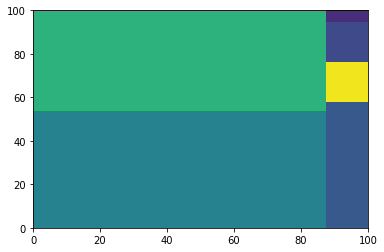

In [12]:
squarify.plot(values)